In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


The data set that I chose for this project is a predictive dataset, with many features that relate to patients with heart conditions such as age, high blood pressure, whether the patient smokes or not, the level of serum sodium in the patients’ blood and a few other variables. In addition to the feature variables in this dataset the target variable is DEATH_EVENT which represents a number 1 if the patient has died due to heart failure and 0 meaning that the patient is still living and did not experience heart failure. This dataset is called heart failure prediction from the website Kaggle.com, https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data. My prediction goal for this dataset is to find the most significant features that contribute to whether a patient will or will not die of heart failure. By finding the features that have the most significance and correlation to the target variable such as if patients who have high blood pressure also eventually passed away due to heart failure, I think that this would bring awareness to physical health and heart health to people across the world. 



https://github.com/zmills1212/DataAnalytics

There are no categorical variables in this dataset, only numeric.

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-n

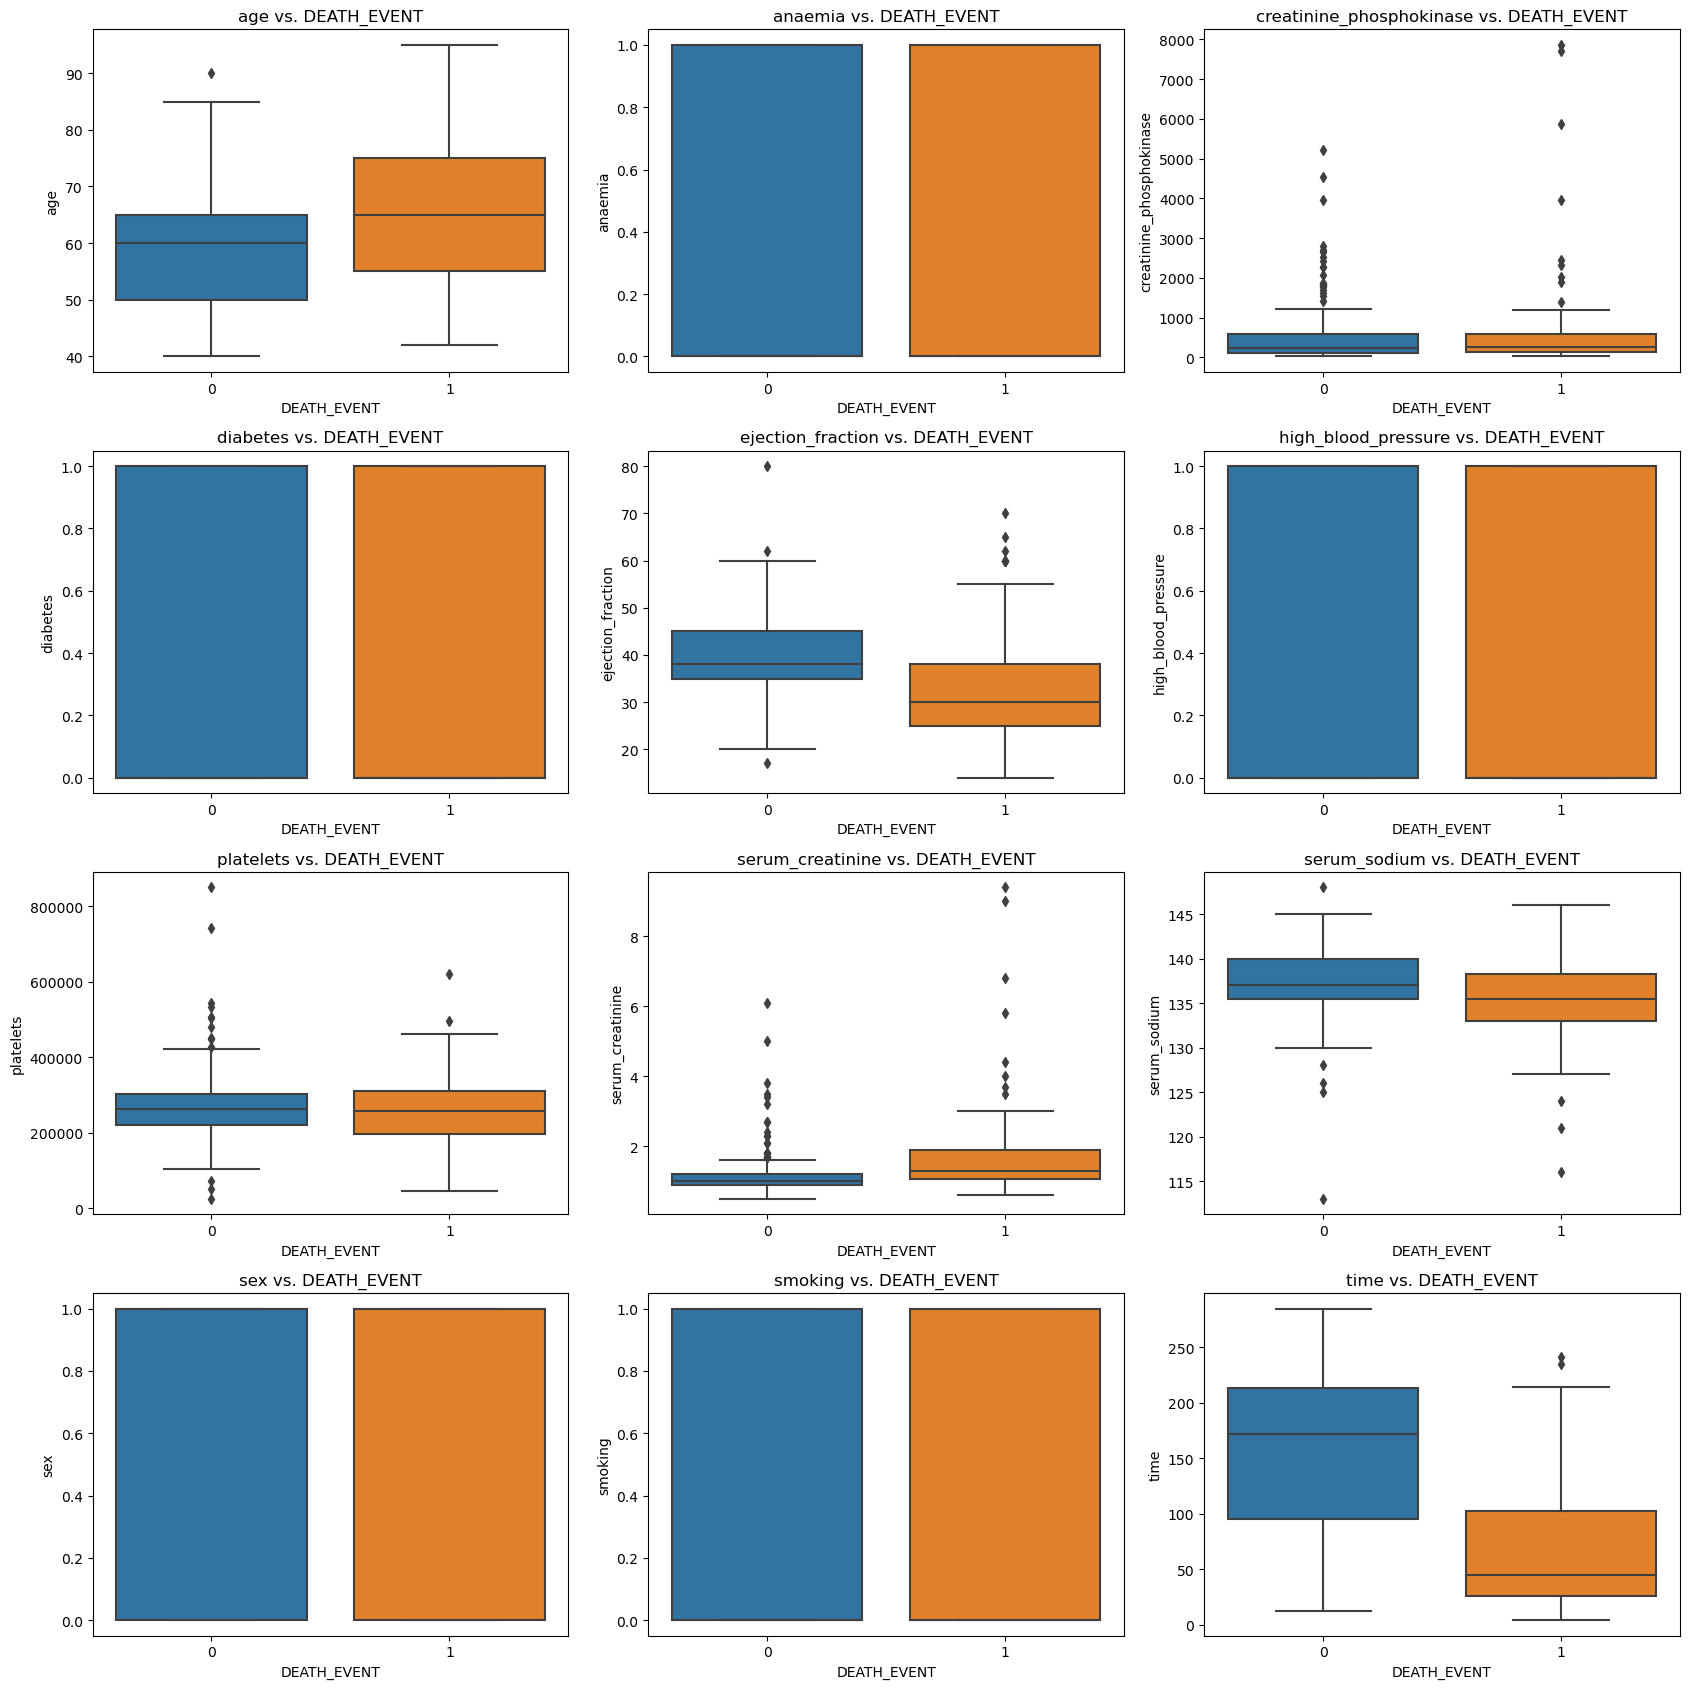

In [6]:
#data cleaning 
print('There are no categorical variables in this dataset, only numeric.\n')
missing_data = df.isnull().sum()
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
print(missing_data)
df.info()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(17, 17))

numeric_variables = [col for col in df.columns if col != 'DEATH_EVENT']

for i, variable in enumerate(numeric_variables):
    row, col = divmod(i, 3)
    sns.boxplot(x='DEATH_EVENT', y=variable, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{variable} vs. DEATH_EVENT')

plt.tight_layout()

plt.show()


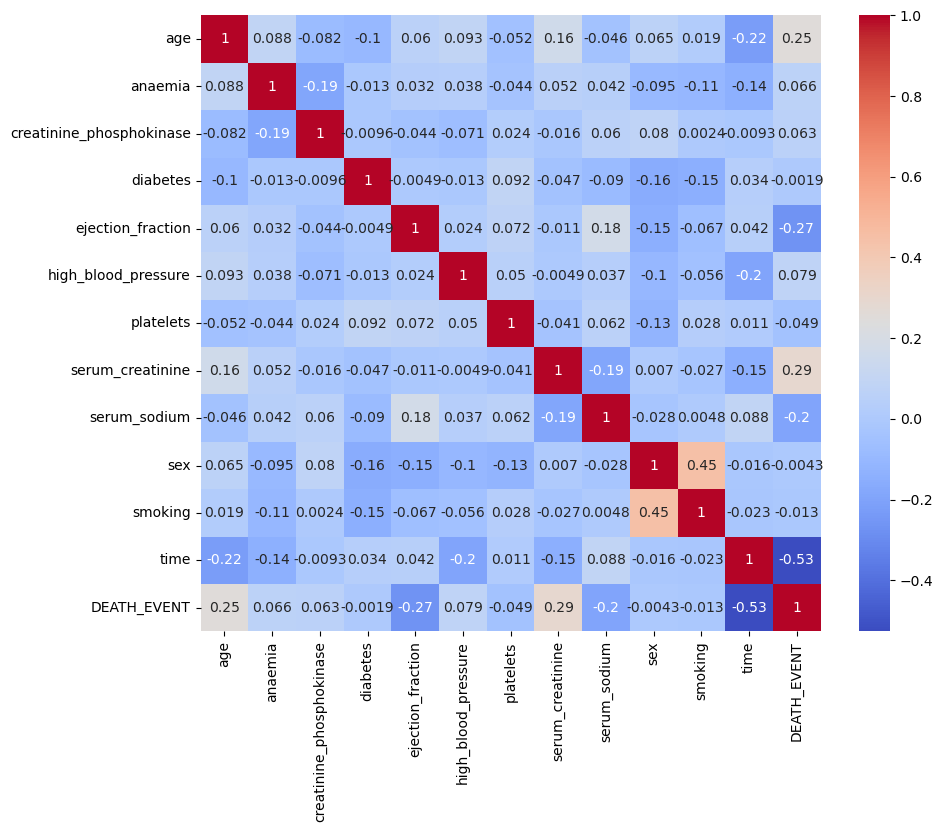

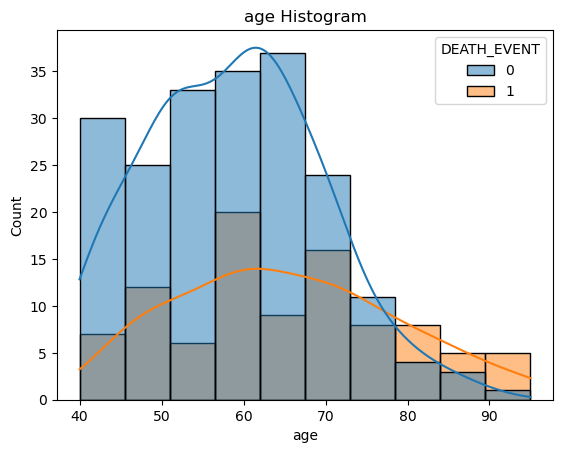

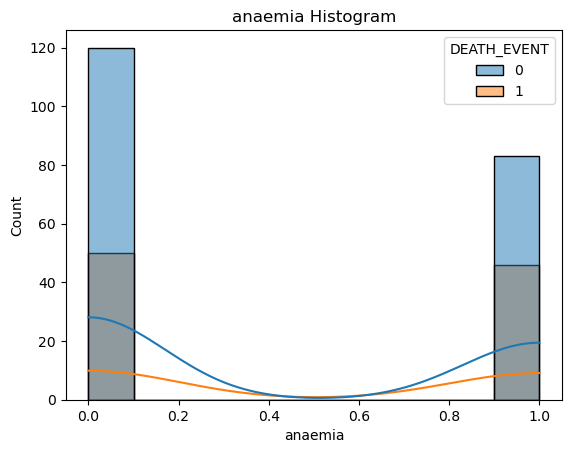

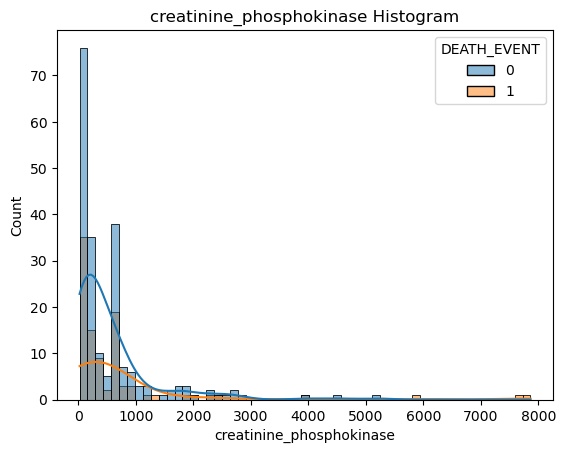

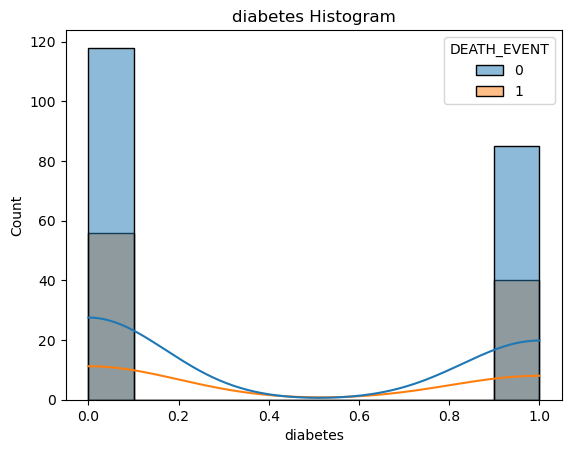

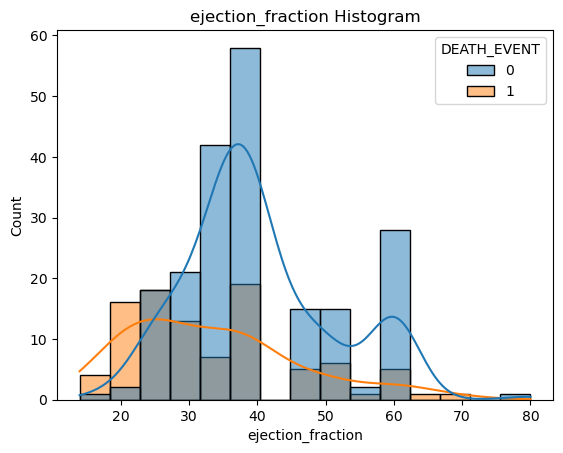

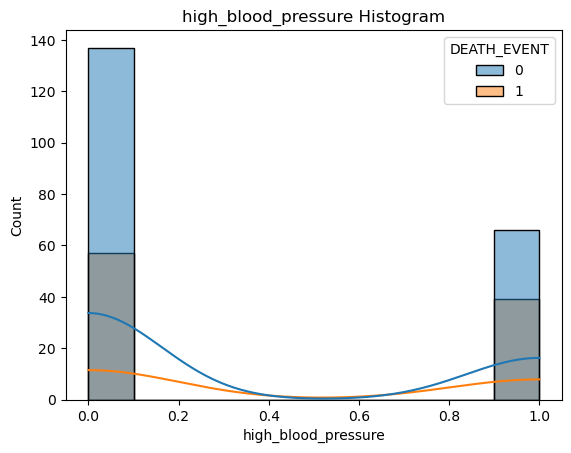

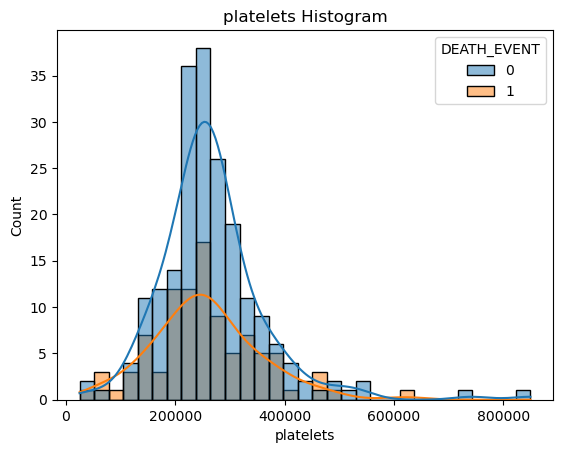

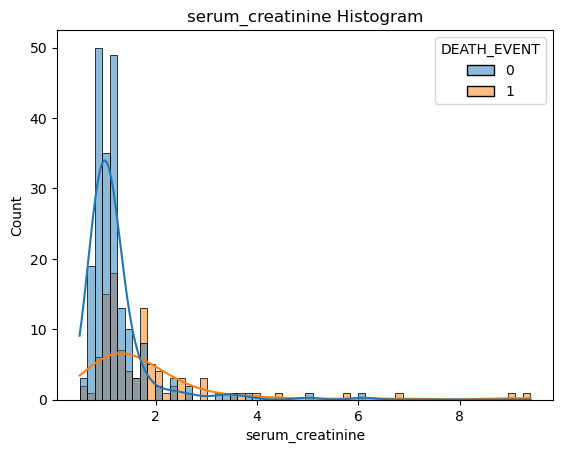

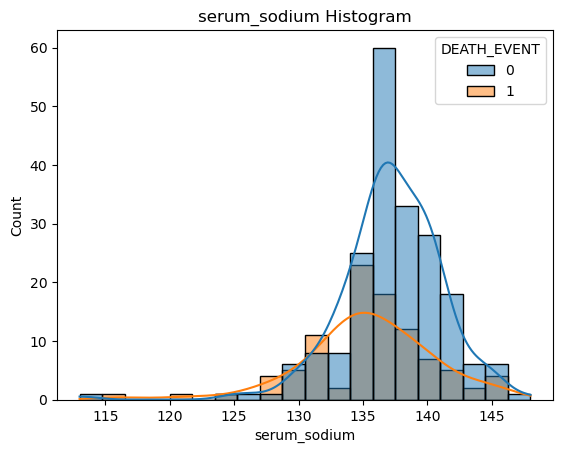

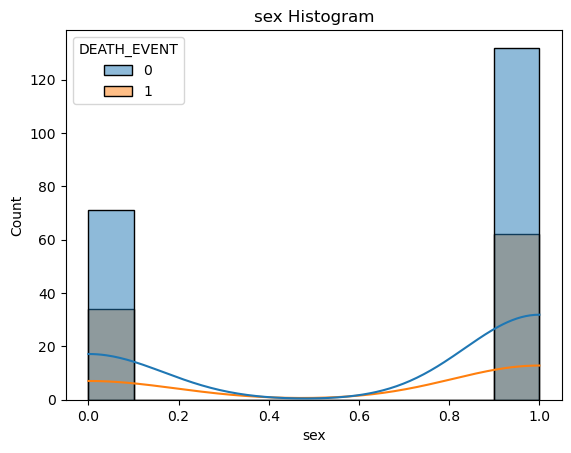

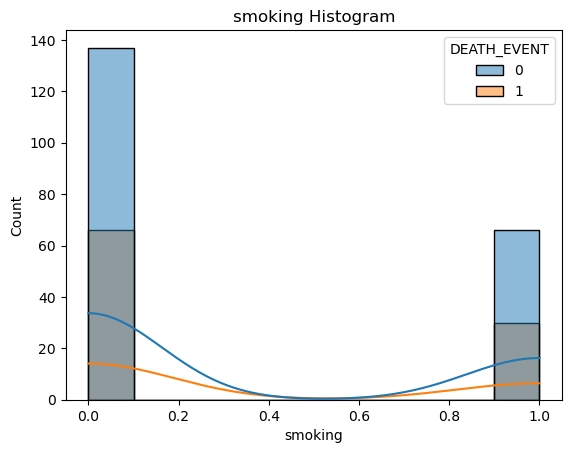

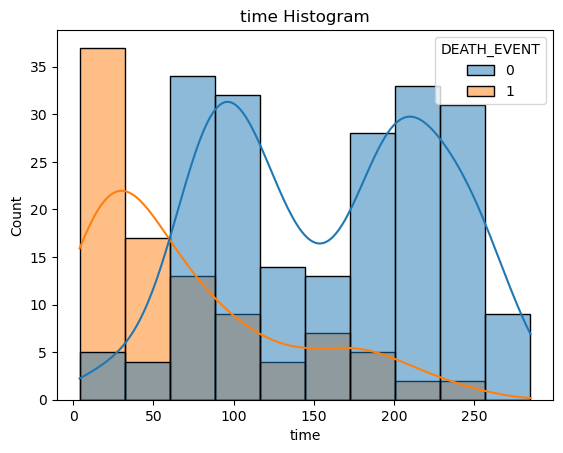

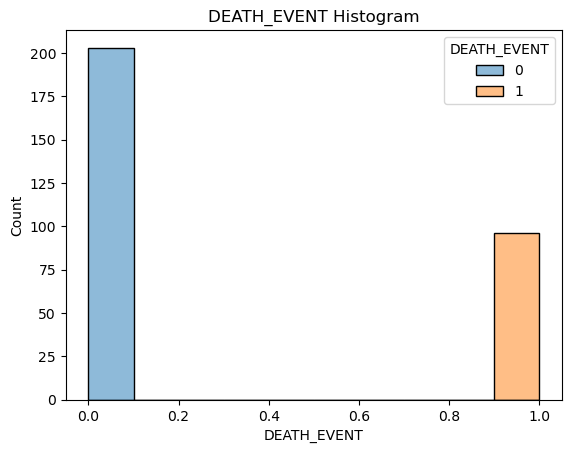

In [14]:
#feature engineering
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

numerical_features = df.select_dtypes(include=[int, float]).columns
for feature in numerical_features:
    sns.histplot(data=df, x=feature, hue='DEATH_EVENT', kde=True)
    plt.title(f'{feature} Histogram')
    plt.show()


In [15]:
#feature engineering
numerical_features = ['age', 'diabetes', 'high_blood_pressure'] 

target_variable = 'DEATH_EVENT' 

features_drop = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df['age'], df['DEATH_EVENT'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    alpha = 0.05
    
    if p < alpha:
        print(f"{feature} is dependent on {target_variable} (p-value={p}), keeping it.")
    else:
        print(f"{feature} is independent of {target_variable} (p-value={p}), dropping it.")
        features_to_drop.append(feature)

df.drop(features_to_drop, axis=1, inplace=True)

print(df.head())


age is dependent on DEATH_EVENT (p-value=0.015227406432460549), keeping it.
diabetes is dependent on DEATH_EVENT (p-value=0.015227406432460549), keeping it.
high_blood_pressure is dependent on DEATH_EVENT (p-value=0.015227406432460549), keeping it.
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3   

In [20]:
#feature engineering
X = df.drop(columns=['DEATH_EVENT'])

threshold = 0.01  
selector = VarianceThreshold(threshold)

selector.fit(X)

low_variance_mask = selector.get_support()

low_variance_features = X.columns[~low_variance_mask]

X_high_variance = X.loc[:, low_variance_mask]

print("Low-Variance Features:")
print(low_variance_features)

print("Remaining High-Variance Features:")
print(X_high_variance.columns)
print('\n')
print('All variables are already converted to binary')

Low-Variance Features:
Index([], dtype='object')
Remaining High-Variance Features:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


All variables are already converted to binary


In [30]:
#prediction model
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.6833333333333333


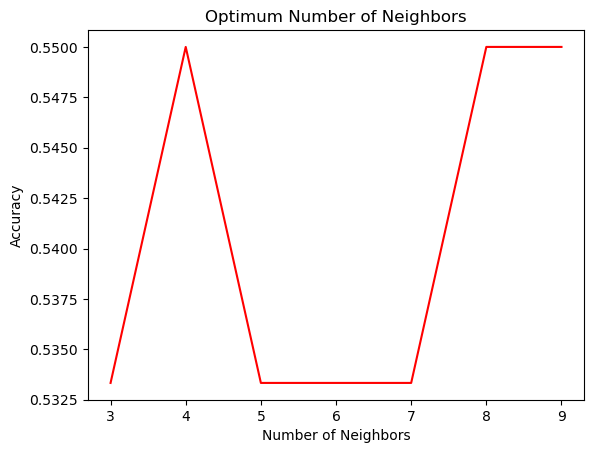

In [39]:
#prediction model
features = df.drop(columns=['DEATH_EVENT']) 
target = df['DEATH_EVENT'] 
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

list1 = []
for neighbors in range(3, 10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='euclidean')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    list1.append(accuracy)

plt.plot(list(range(3, 10)), list1, color ='red')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Optimum Number of Neighbors')
plt.show()

In [37]:
#prediction model
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


Knn is suitable because it is straight forwards and simple to implement. K nearest neighbors is very robust and doesn’t make strong assumptions about the data given. Also all of my data is numeric so it is easy for k nearest neighbors to split into a test and training set for the algorithm to implement.

The accuracy in my data set which is  0.68333 is a generally high accuracy level based on the accuracy score function. even though this is not the only measure of how accurate a dataset is. This number tells me that almost 70 percent of the data is correctly classified which is not terribly bad . 